In [1]:
%matplotlib inline

## Test `bolplanck` ==> `bolplanck`

In [2]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname='bolplanck')
Vbox_source = np.prod(halocat.Lbox)

from halotools.empirical_models import PrebuiltHodModelFactory
model = PrebuiltHodModelFactory('cacciato09', prim_haloprop_key='halo_mvir')

model.populate_mock(halocat)


In [3]:
source_galaxies = model.mock.galaxy_table
source_halos = model.mock.halo_table

target_halocat = CachedHaloCatalog(simname='bolplanck')
Vbox_target = np.prod(target_halocat.Lbox)
target_host_halo_mask = target_halocat.halo_table['halo_upid'] == -1
target_halos = target_halocat.halo_table[target_host_halo_mask]



from galsampler import halo_bin_indices
mhost_bins = np.logspace(11, 15.5, 50)

source_halos['bin_number'] = halo_bin_indices(mass=(source_halos['halo_mvir'], mhost_bins))
target_halos['bin_number'] = halo_bin_indices(mass=(target_halos['halo_mvir'], mhost_bins))


Source galaxy number density = 0.0061
Target galaxy number density = 0.0060
Fractional difference = -0.00


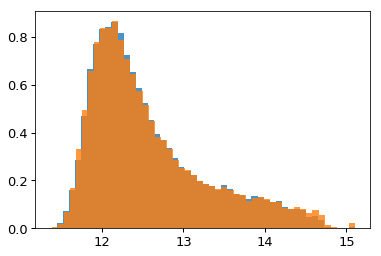

In [4]:
from galsampler.end_to_end import source_galaxy_selection_indices

nhalo_min = 25
indices, host_target_ids = source_galaxy_selection_indices(source_galaxies['halo_hostid'], 
                        source_halos['halo_id'], source_halos['bin_number'], 
                        target_halos['bin_number'], target_halos['halo_id'], 
                        nhalo_min, mhost_bins)

from halotools.utils import crossmatch 

idxA, idxB = crossmatch(host_target_ids, target_halos['halo_id'])

from astropy.table import Table
target_galaxies = Table()
target_galaxies['halo_mvir'] = target_halos['halo_mvir'][idxB]
target_galaxies['target_halo_id'] = target_halos['halo_id'][idxB]
target_galaxies['source_halo_id'] = source_galaxies['halo_hostid'][indices]
target_galaxies['luminosity'] = source_galaxies['luminosity'][indices]

fig, ax = plt.subplots(1, 1)

__=ax.hist(np.log10(target_galaxies['halo_mvir']), bins=50, alpha=0.8, normed=True)
__=ax.hist(np.log10(source_galaxies['halo_mvir']), bins=50, alpha=0.8, normed=True)


nd_source = len(source_galaxies)/Vbox_source
nd_target = len(target_galaxies)/Vbox_target

print("Source galaxy number density = {0:.4f}".format(nd_source))
print("Target galaxy number density = {0:.4f}".format(nd_target))
fracdiff = (nd_target-nd_source)/nd_source

print("Fractional difference = {0:.2f}".format(fracdiff))

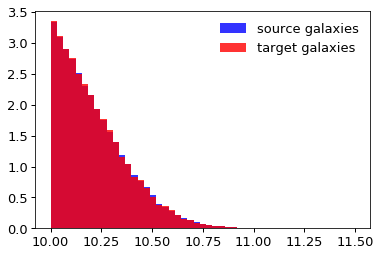

In [5]:
fig, ax = plt.subplots(1, 1)

bins = np.linspace(10, 11.5, 50)
__=ax.hist(np.log10(source_galaxies['luminosity']), normed=True, bins=bins, 
          alpha=0.8, color='blue', label='source galaxies')
__=ax.hist(np.log10(target_galaxies['luminosity']), normed=True, bins=bins, 
          alpha=0.8, color='red', label='target galaxies')

legend = ax.legend()

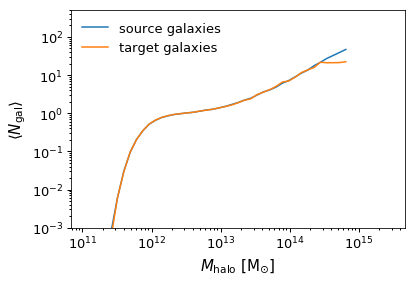

In [6]:
from halotools.mock_observables import hod_from_mock

source_hod, __ = hod_from_mock(source_galaxies['halo_mvir'], source_halos['halo_mvir'], 
             haloprop_bins=mhost_bins)
target_hod, __ = hod_from_mock(target_galaxies['halo_mvir'], target_halos['halo_mvir'], 
             haloprop_bins=mhost_bins)

mhost_mids = 0.5*(mhost_bins[:-1] + mhost_bins[1:])

fig, ax = plt.subplots(1, 1)

__=ax.loglog()

ylim = ax.set_ylim(1e-3, 500)
__=ax.plot(mhost_mids, source_hod, label='source galaxies')
__=ax.plot(mhost_mids, target_hod, label='target galaxies')
legend = ax.legend()
xlabel = ax.set_xlabel(r'$M_{\rm halo}$ $[{\rm M_{\odot}}]$')
ylabel = ax.set_ylabel(r'$\langle N_{\rm gal}\rangle$')

## Test `bolplanck` ==> `multidark`

In [7]:

target_halocat = CachedHaloCatalog(simname='multidark')
Vbox_target = np.prod(target_halocat.Lbox)
target_host_halo_mask = target_halocat.halo_table['halo_upid'] == -1
target_halos = target_halocat.halo_table[target_host_halo_mask]

from galsampler import halo_bin_indices
mhost_bins = np.logspace(11, 15, 25)

source_halos['bin_number'] = halo_bin_indices(mass=(source_halos['halo_mvir'], mhost_bins))
target_halos['bin_number'] = halo_bin_indices(mass=(target_halos['halo_mvir'], mhost_bins))


In [8]:
from galsampler.end_to_end import source_galaxy_selection_indices

nhalo_min = 25
indices, host_target_ids = source_galaxy_selection_indices(source_galaxies['halo_hostid'], 
                        source_halos['halo_id'], source_halos['bin_number'], 
                        target_halos['bin_number'], target_halos['halo_id'], 
                        nhalo_min, mhost_bins)

from halotools.utils import crossmatch 

idxA, idxB = crossmatch(host_target_ids, target_halos['halo_id'])

from astropy.table import Table
target_galaxies = Table()
target_galaxies['halo_mvir'] = target_halos['halo_mvir'][idxB]
target_galaxies['target_halo_id'] = target_halos['halo_id'][idxB]
target_galaxies['source_halo_id'] = source_galaxies['halo_hostid'][indices]
target_galaxies['luminosity'] = source_galaxies['luminosity'][indices]

nd_source = len(source_galaxies)/Vbox_source
nd_target = len(target_galaxies)/Vbox_target

print("Source galaxy number density = {0:.4f}".format(nd_source))
print("Target galaxy number density = {0:.4f}".format(nd_target))
fracdiff = (nd_target-nd_source)/nd_source

print("Fractional difference = {0:.2f}".format(fracdiff))

Source galaxy number density = 0.0061
Target galaxy number density = 0.0023
Fractional difference = -0.62


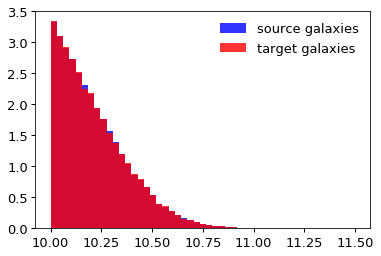

In [9]:
fig, ax = plt.subplots(1, 1)

bins = np.linspace(10, 11.5, 50)
__=ax.hist(np.log10(source_galaxies['luminosity']), normed=True, bins=bins, 
          alpha=0.8, color='blue', label='source galaxies')
__=ax.hist(np.log10(target_galaxies['luminosity']), normed=True, bins=bins, 
          alpha=0.8, color='red', label='target galaxies')

legend = ax.legend()

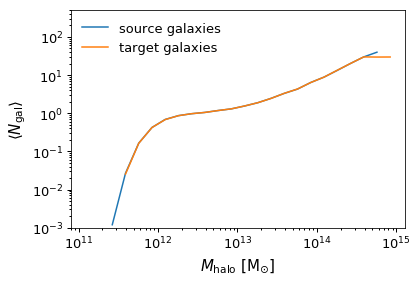

In [10]:
from halotools.mock_observables import hod_from_mock

source_hod, __ = hod_from_mock(source_galaxies['halo_mvir'], source_halos['halo_mvir'], 
             haloprop_bins=mhost_bins)
target_hod, __ = hod_from_mock(target_galaxies['halo_mvir'], target_halos['halo_mvir'], 
             haloprop_bins=mhost_bins)

mhost_mids = 0.5*(mhost_bins[:-1] + mhost_bins[1:])

fig, ax = plt.subplots(1, 1)

__=ax.loglog()

ylim = ax.set_ylim(1e-3, 500)
__=ax.plot(mhost_mids, source_hod, label='source galaxies')
__=ax.plot(mhost_mids, target_hod, label='target galaxies')
legend = ax.legend()
xlabel = ax.set_xlabel(r'$M_{\rm halo}$ $[{\rm M_{\odot}}]$')
ylabel = ax.set_ylabel(r'$\langle N_{\rm gal}\rangle$')